In [1]:
import seaborn as sb, pandas as pd, matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier


In [8]:
def get_training_dataset(binary=False):
    df = pd.read_csv('../UNSW-NB15/data/UNSW_NB15_training-set_cleaned.csv')
    df.drop_duplicates(inplace=True)
    labels = df.iloc[:, -1] if binary else df.iloc[:, -2]
    return df.iloc[:, 0:39], labels

In [3]:
def get_mutual_info():
    X_train, y_train = get_training_dataset()
    
    mutual_info = mutual_info_classif(X_train, y_train)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = X_train.columns
    return mutual_info.sort_values(ascending = False)

def get_random_forest_info():
    X_train, y_train = get_training_dataset()
    clf = RandomForestClassifier()
    clf = clf.fit(X_train, y_train)
    rf_info = pd.Series(clf.feature_importances_)
    rf_info.index = X_train.columns
    return rf_info.sort_values(ascending = False)


In [4]:
def eval():
    mutual_info = get_mutual_info()
    rf_info = get_random_forest_info()

    
    plt.figure(figsize=(12,5))
    plt.title("Feature ranking by Info Gain")
    plt.bar(mutual_info.index, mutual_info, width=0.6, color="red")
    plt.axhline(0.25, c="black", ls="--")
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Feature ranking by RF Importance")
    plt.bar(rf_info.index, rf_info, width=0.6, color="red")
    plt.axhline(0.02, c="black", ls="--")
    plt.xticks(rotation=90)
    plt.show()

    return mutual_info, rf_info
    

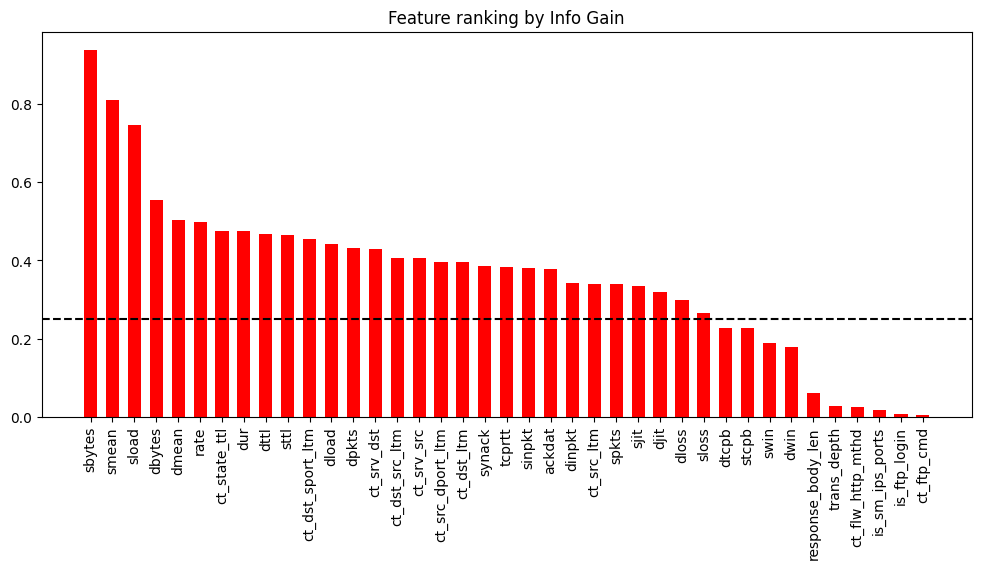

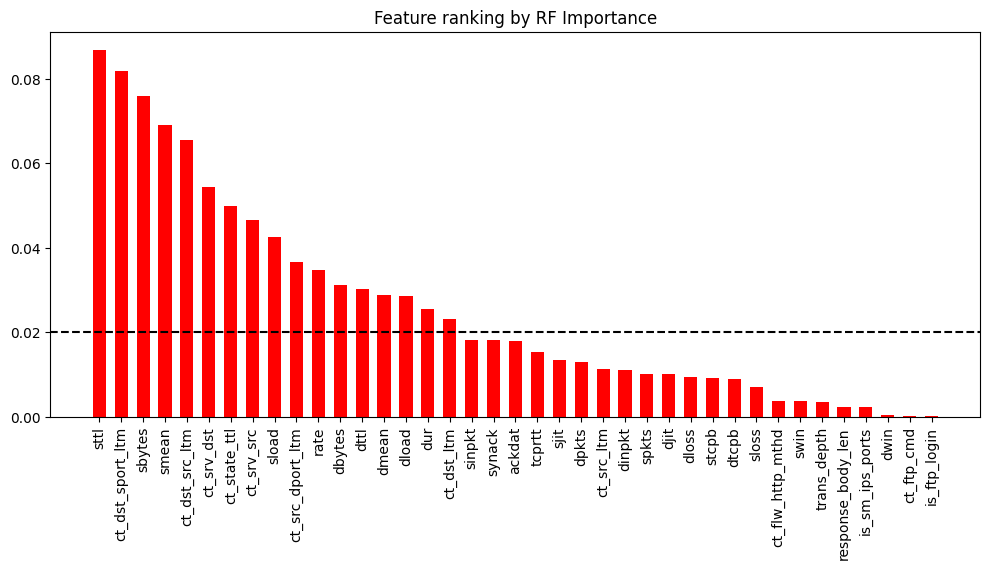

In [5]:
mutual_info, rf_info = eval()

In [6]:
mutual_info = mutual_info[mutual_info>0.25]
print(len(mutual_info), mutual_info)
rf_info = rf_info[rf_info>0.02]
print(len(rf_info), rf_info)

29 sbytes              0.938369
smean               0.811622
sload               0.747510
dbytes              0.553504
dmean               0.504862
rate                0.499325
ct_state_ttl        0.476106
dur                 0.475930
dttl                0.468658
sttl                0.465850
ct_dst_sport_ltm    0.456112
dload               0.442943
dpkts               0.432693
ct_srv_dst          0.429300
ct_dst_src_ltm      0.407338
ct_srv_src          0.405920
ct_src_dport_ltm    0.395934
ct_dst_ltm          0.395458
synack              0.385213
tcprtt              0.382032
sinpkt              0.380081
ackdat              0.377502
dinpkt              0.343477
ct_src_ltm          0.340814
spkts               0.338869
sjit                0.334341
djit                0.320392
dloss               0.299186
sloss               0.264606
dtype: float64
17 sttl                0.086741
ct_dst_sport_ltm    0.081776
sbytes              0.075786
smean               0.069059
ct_dst_src_ltm      0.

In [7]:
igrf_intersection = set(rf_info.index).intersection(set(mutual_info.index))
igrf_union = set(rf_info.index).union(set(mutual_info.index))
print(len(igrf_union), igrf_union)
print(len(igrf_intersection), igrf_intersection)

29 {'tcprtt', 'dur', 'sjit', 'rate', 'ct_dst_sport_ltm', 'sinpkt', 'ct_state_ttl', 'ackdat', 'dttl', 'ct_src_dport_ltm', 'dpkts', 'dinpkt', 'ct_srv_src', 'ct_dst_src_ltm', 'sload', 'dbytes', 'spkts', 'dload', 'ct_srv_dst', 'dmean', 'smean', 'dloss', 'ct_dst_ltm', 'synack', 'sttl', 'ct_src_ltm', 'sloss', 'djit', 'sbytes'}
17 {'dttl', 'sttl', 'dur', 'ct_src_dport_ltm', 'dload', 'sbytes', 'rate', 'ct_dst_sport_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_dst_src_ltm', 'smean', 'sload', 'dmean', 'ct_state_ttl', 'dbytes', 'ct_dst_ltm'}
